In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:90%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:14pt;}
div.text_cell_render.rendered_html{font-size:20pt;}
div.text_cell_render ul li, code{font-size:22pt; line-height:30px;}
div.output {font-size:14pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:14pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:14pt;padding:5px;}
table.dataframe{font-size:14px;}
</style>
"""))

# <span style="color:red">ch1. NLTK 자연어처리 패키지</span>
# ch2. 한글 형태소 분석
# 1. 자연어처리
- 자연어 : 일상적인 언어
- 자연어 처리 분야
   * 자연어 이해 : 형태소분석 -> pos tagging(품사태깅) -> 의미분석(빈도분석, 연관분석)
   * 자연어 이해&생성 : RNN/LSTM/GRU -> seq2seq -> 트랜스포머
- 활용분야 : 트랜드분석, 탐색적 분석, 맞춤법검사, 번역기, 쳇봇
# 2. 자연어 이해/생성 처리 절차
- 전처리 : 단어/어절 추출 (특수문자 ㅎㅎ 제외)
- 분석 후보 생성 : 형태소분리, 품사태깅
- 제약 조건 : 불용어 처리, 규칙 확인
- 분석 : 시각화(워드클라우드, Text), 유사성 분석, 연관분석, RNN/LSTM/GUR, ....
# 3. 형태소 분석 엔진
- Konlpy (pip install konlpy)
    * HanNanum : java로 만든 형태소 분석기(JAVA_HOME환경변수, Path설정)
    * Kkma     : java로 만든 형태소 분석기(JAVA_HOME환경변수, Path설정)
    * Komoran  : java로 만든 형태소 분석기(JAVA_HOME환경변수, Path설정)
    * Okt      : java로 만든 형태소 분석기(JAVA_HOME환경변수, Path설정)
- Mecab (pip install python-mecab-ko) 
    * Mecab : C++로 만든 형태소 분석기. 저사양환경에서 사용 가능 - 가볍다(일본어처리)
- 공통기능 : morphs(형태소 나누기), nouns(명사추출), pos(형태소로 나누어 품사태그)
- pos tagging chat 다운로드
    * 구글에서 konlpy docs -> https://konlpy.org/en/latest/
    * api 메뉴 -> "Comparison between POS tagging classes" 클릭 ->
    * "Korean POS tags comparison chart" 다운로드

In [2]:
%pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install konlpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install python-mecab-ko

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip show konlpy

Name: konlpyNote: you may need to restart the kernel to use updated packages.

Version: 0.6.0
Summary: Python package for Korean natural language processing.
Home-page: http://konlpy.org
Author: Team KoNLPy
Author-email: konlpy@googlegroups.com
License: GPL v3
Location: c:\users\admin\anaconda3\envs\ml-dl-nlp\lib\site-packages
Requires: JPype1, lxml, numpy
Required-by: 


In [7]:
%pip show python-mecab-ko

Name: python-mecab-ko
Version: 1.3.7
Summary: A python binding for mecab-ko
Home-page: https://github.com/jonghwanhyeon/python-mecab-ko
Author: Jonghwan Hyeon
Author-email: jonghwanhyeon93@gmail.com
License: BSD 3-Clause License
Location: c:\users\admin\anaconda3\envs\ml-dl-nlp\lib\site-packages
Requires: python-mecab-ko-dic
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip show wordcloud

Name: wordcloud
Version: 1.9.4
Summary: A little word cloud generator
Home-page: https://github.com/amueller/word_cloud
Author: 
Author-email: Andreas Mueller <t3kcit+wordcloud@gmail.com>
License: MIT License
Location: c:\users\admin\anaconda3\envs\ml-dl-nlp\lib\site-packages
Requires: matplotlib, numpy, pillow
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install gensim

In [10]:
import os
os.environ.get('JAVA_HOME')

'C:\\Program Files\\Java\\jdk-17'

In [11]:
import konlpy
konlpy.__version__  # 에러나는 경우 jpype1라이브러리를 수동 설치(현버전에서는 X)

'0.6.0'

In [12]:
text = """아름답지만 다소 복잡하기도 한 한국어는 전세계에서
13번째로 많이 사용되는 언어입니다"""

## 3.1 HanNanum

In [13]:
from konlpy.tag import Hannanum
hannanum = Hannanum(jvmpath=None)  # 기본값:1024MB ->'1g' '10m'
# 입력된 텍스트를 가장 세밀하게 분석해서 형태소, 품사, 원형등의 후보군을 모두 반환
hannanum.analyze(text)

[[[('아름답', 'paa'), ('지만', 'ecs')],
  [('아름답', 'paa'), ('지', 'ecs'), ('만', 'jxc')],
  [('아름답', 'paa'), ('지', 'ecx'), ('말', 'px'), ('ㄴ', 'etm')]],
 [[('다소', 'mag')], [('다소', 'ncn')]],
 [[('복잡', 'ncn'), ('하기', 'ncn'), ('도', 'jxc')],
  [('복잡', 'ncn'), ('하기', 'ncn'), ('도', 'ncn')],
  [('복잡', 'ncps'), ('하기', 'ncn'), ('도', 'jxc')],
  [('복잡', 'ncps'), ('하기', 'ncn'), ('도', 'ncn')],
  [('복잡', 'ncps'), ('하', 'xsms'), ('기', 'etn'), ('도', 'jxc')]],
 [[('하', 'pvg'), ('ㄴ', 'etm')],
  [('한', 'nnc')],
  [('한', 'ncn')],
  [('한', 'nbn')],
  [('하', 'px'), ('ㄴ', 'etm')]],
 [[('한국어', 'ncn'), ('는', 'jxc')]],
 [[('전세계', 'ncn'), ('에서', 'jca')],
  [('전세', 'ncn'), ('계', 'ncn'), ('에서', 'jca')],
  [('전', 'xp'), ('세계', 'ncn'), ('에서', 'jca')]],
 [],
 [[('13', 'nnc'), ('번', 'nbu'), ('째', 'xsnu'), ('로', 'jca')]],
 [[('많', 'paa'), ('이', 'xsa')], [('많이', 'mag')]],
 [[('사용', 'ncpa'), ('되', 'xsvn'), ('는', 'etm')]],
 [[('언어', 'ncn'), ('이', 'jp'), ('ㅂ니다', 'ef')]]]

In [14]:
# 형태소 분석 : morphs
print(hannanum.morphs(text))

['아름답', '지만', '다소', '복잡', '하', '기', '도', '하', 'ㄴ', '한국어', '는', '전세계', '에서', '13번', '째', '로', '많', '이', '사용', '되', '는', '언어', '이', 'ㅂ니다']


In [15]:
# 명사만 추출 : nouns
print(hannanum.nouns(text))

['복잡', '한국어', '전세계', '13번', '사용', '언어']


In [16]:
# 품사태그 : pos
print(hannanum.pos(text, ntags=9) )  # 품사 갯수 기본값 : ntags=9

[('아름답', 'P'), ('지만', 'E'), ('다소', 'M'), ('복잡', 'N'), ('하', 'X'), ('기', 'E'), ('도', 'J'), ('하', 'P'), ('ㄴ', 'E'), ('한국어', 'N'), ('는', 'J'), ('전세계', 'N'), ('에서', 'J'), ('13번', 'N'), ('째', 'X'), ('로', 'J'), ('많', 'P'), ('이', 'X'), ('사용', 'N'), ('되', 'X'), ('는', 'E'), ('언어', 'N'), ('이', 'J'), ('ㅂ니다', 'E')]


In [17]:
# 품사태그 : pos
print(hannanum.pos(text, ntags=22) )  # 품사 갯수 기본값 : ntags=9

[('아름답', 'PA'), ('지만', 'EC'), ('다소', 'MA'), ('복잡', 'NC'), ('하', 'XS'), ('기', 'ET'), ('도', 'JX'), ('하', 'PV'), ('ㄴ', 'ET'), ('한국어', 'NC'), ('는', 'JX'), ('전세계', 'NC'), ('에서', 'JC'), ('13', 'NN'), ('번', 'NB'), ('째', 'XS'), ('로', 'JC'), ('많', 'PA'), ('이', 'XS'), ('사용', 'NC'), ('되', 'XS'), ('는', 'ET'), ('언어', 'NC'), ('이', 'JP'), ('ㅂ니다', 'EF')]


In [18]:
%%time
# 퀴즈1. pos tag 결과에서 명사(NC, NQ, NB, NN)만 추출하기
tagged_text = hannanum.pos(text, ntags=22)
[token for token, tag in tagged_text if tag in ('NC', 'NQ', 'NB', 'NN')]

CPU times: total: 0 ns
Wall time: 7.02 ms


['복잡', '한국어', '전세계', '13', '번', '사용', '언어']

In [19]:
# 퀴즈2. text에서 보통명사(NC)만 추출하기
[token for token, tag in tagged_text if tag == 'NC']

['복잡', '한국어', '전세계', '사용', '언어']

In [20]:
# 퀴즈3. text에서 형용사(PA)만 추출하기
[token for token, tag in tagged_text if tag == 'PA']

['아름답', '많']

## 3.2 Kkma

In [21]:
from konlpy.tag import Kkma
kkma = Kkma()
# 형태소 분석
print(kkma.morphs(text))

['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전세계', '에서', '13', '번째', '로', '많이', '사용', '되', '는', '언어', '이', 'ㅂ니다']


In [22]:
# 명사추출
print(kkma.nouns(text))

['복잡', '한국어', '전세계', '13', '13번째', '번째', '사용', '언어']


In [23]:
# 품사태그
print(kkma.pos(text))

[('아름답', 'VA'), ('지만', 'ECE'), ('다소', 'MAG'), ('복잡', 'NNG'), ('하', 'XSV'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MDN'), ('한국어', 'NNG'), ('는', 'JX'), ('전세계', 'NNG'), ('에서', 'JKM'), ('13', 'NR'), ('번째', 'NNB'), ('로', 'JKM'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETD'), ('언어', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN')]


In [24]:
# 품사태그를 통해 명사(NNG, NNP, NNB,NNM, NR, NP)만 추출
tagged_text = kkma.pos(text)
[token for token, tag in tagged_text if tag in ('NNG', 'NNP', 'NNB','NNM', 'NR', 'NP')]

['복잡', '한국어', '전세계', '13', '번째', '사용', '언어']

In [25]:
# 품사태그를 통해 보통명사만 추출
[token for token, tag in tagged_text if tag =='NNG']

['복잡', '한국어', '전세계', '사용', '언어']

## 3.3 Komoran

In [26]:
text = """아름답지만 다소 복잡하기도 한 한국어는 전세계에서
13번째로 많이 사용되는 언어입니다"""

In [27]:
from konlpy.tag import Komoran
komoran = Komoran()
# 형태소 분석
print(komoran.morphs(text))

['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전', '세계', '에서', '13', '번', '째', '로', '많이', '사용', '되', '는', '언어', '이', 'ㅂ니다']


In [28]:
# 명사 추출
print(komoran.nouns(text))

['한국어', '전', '세계', '번', '사용', '언어']


In [29]:
# 품사 태깅
tagged_text = komoran.pos(text)
print(tagged_text)

[('아름답', 'VA'), ('지만', 'EC'), ('다소', 'MAG'), ('복잡', 'XR'), ('하', 'XSA'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MM'), ('한국어', 'NNP'), ('는', 'JX'), ('전', 'NNG'), ('세계', 'NNG'), ('에서', 'JKB'), ('13', 'SN'), ('번', 'NNB'), ('째', 'XSN'), ('로', 'JKB'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETM'), ('언어', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EC')]


In [30]:
# 품사태그를 이용하여 명사(NNG, NNP, NNB,NR, NP) 만 추출
[token for token, tag in tagged_text if tag in ('NNG', 'NNP', 'NNB','NR', 'NP')]

['한국어', '전', '세계', '번', '사용', '언어']

## 3.4 Twitter(Okt : Open Korean Text)
- SNS 텍스트 분석용 개발
- 속도가 빠름

In [31]:
%%time
from konlpy.tag import Okt, Twitter
# okt = Twitter()
okt = Okt()
# print('명사구 추출 : ', okt.phrases(text))
print('형태소 추출', okt.morphs(text))
print('명사 추출', okt.nouns(text))
tagged_text = okt.pos(text)
print('품사 태김을 이용한 명사 추출 : ', 
      [token for token, tag in tagged_text if tag=='Noun'])
print('품사 태깅 :', tagged_text)

형태소 추출 ['아름답지만', '다소', '복잡하기도', '한', '한국어', '는', '전세계', '에서', '\n', '13', '번', '째', '로', '많이', '사용', '되는', '언어', '입니다']
명사 추출 ['다소', '한국어', '전세계', '번', '사용', '언어']
품사 태김을 이용한 명사 추출 :  ['다소', '한국어', '전세계', '번', '사용', '언어']
품사 태깅 : [('아름답지만', 'Adjective'), ('다소', 'Noun'), ('복잡하기도', 'Adjective'), ('한', 'Verb'), ('한국어', 'Noun'), ('는', 'Josa'), ('전세계', 'Noun'), ('에서', 'Josa'), ('\n', 'Foreign'), ('13', 'Number'), ('번', 'Noun'), ('째', 'Suffix'), ('로', 'Josa'), ('많이', 'Adverb'), ('사용', 'Noun'), ('되는', 'Verb'), ('언어', 'Noun'), ('입니다', 'Adjective')]
CPU times: total: 8.88 s
Wall time: 1.88 s


## 3.5 Mecab
- pip install python-mecab-ko
- 압도적 속도(konlpy 대비 5~15배 빠름)
- 낮은 메모리 사용량
- 형태소 분해 정확도 높음

In [32]:
%%time
from mecab import MeCab
mecab = MeCab()
print('형태소 추출', mecab.morphs(text))
print('명사 추출', mecab.nouns(text))
tagged_text = mecab.pos(text)
print('품사 태깅을 이용한 명사 추출 : ', 
      [token for token, tag in tagged_text if tag in ('NNG','NNP','NNB','NNBC')])
print('품사 태깅 :', tagged_text)

형태소 추출 ['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전', '세계', '에서', '13', '번', '째', '로', '많이', '사용', '되', '는', '언어', '입니다']
명사 추출 ['한국어', '세계', '번', '사용', '언어']
품사 태깅을 이용한 명사 추출 :  ['한국어', '세계', '번', '사용', '언어']
품사 태깅 : [('아름답', 'VA'), ('지만', 'EC'), ('다소', 'MAG'), ('복잡', 'XR'), ('하', 'XSA'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MM'), ('한국어', 'NNG'), ('는', 'JX'), ('전', 'MM'), ('세계', 'NNG'), ('에서', 'JKB'), ('13', 'SN'), ('번', 'NNBC'), ('째', 'XSN'), ('로', 'JKB'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETM'), ('언어', 'NNG'), ('입니다', 'VCP+EC')]
CPU times: total: 141 ms
Wall time: 24.8 ms


# 4. 말뭉치

In [33]:
# 영어 말뭉치
import nltk
emma = nltk.corpus.gutenberg.raw('austen-emma.txt')
emma[:10]

'[Emma by J'

In [34]:
# 한글 말뭉치
# %pip show konlpy
from konlpy.corpus import kolaw
# data = kolaw.open('constitution.txt').readlines() # 한줄씩 list로 반환
data = kolaw.open('constitution.txt').read()
print('글자수 : ',len(data))

글자수 :  18884


# 5. 워드클라우드
- pip install wordcloud

In [35]:
nouns = ['world1','world2','world1','world2']
' '.join(nouns)

'world1 world2 world1 world2'

In [36]:
# emma 말뭉치에서 단어(특수문자를 제외) -> 명사(NN,NNS,NNP,NNPS)추출 -> 연결 -> 워드클라우드
from nltk.tokenize import RegexpTokenizer
from nltk.tag import pos_tag
ret = RegexpTokenizer('[0-9a-zA-Z]{2,}')   # ('\w{2,}') 문자 2개 이상
words = ret.tokenize(emma)
# pos tagging -> 명사 추출
emma_tags = pos_tag(words)
noun_list = [token for token, tag in emma_tags if tag in ('NN','NNS','NNP','NNPS')]
# 연결
emma_noun = ' '.join(noun_list)
print('워드클라우드를 그릴 text 내용 :', emma_noun[:20])

워드클라우드를 그릴 text 내용 : Emma Jane Austen VOL


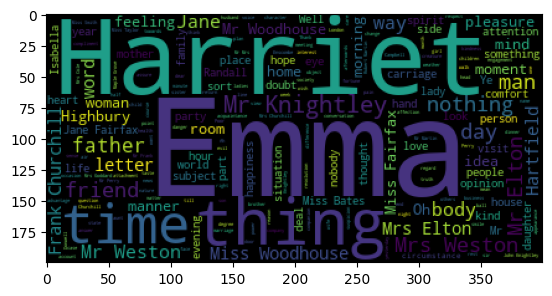

In [37]:
# 워드클라우드
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wordc = WordCloud()
wordc.generate(emma_noun)
plt.imshow(wordc)
plt.show()

- 컬러맵 : https://matplotlib.org/stable/users/explain/colors/colormaps.html

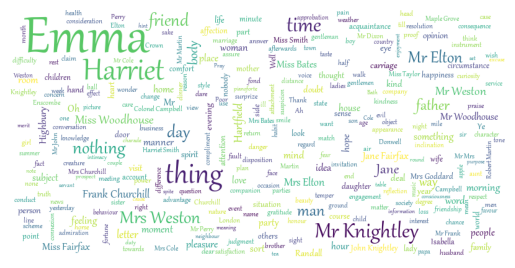

In [66]:
wordcloud = WordCloud(
    font_path='C:/Windows/Fonts/Gabriola.ttf',
    background_color='white',# 배경색
    width=800, height=400,   # 생성될 이미지 가로 세로(픽셀)
    max_words = 300,         # 최대 표시될 단어 갯수
    relative_scaling=0.9,    # 단어 빈도에 따른 크기 차이 조정
    colormap='viridis',      # 글씨 컬러맵
    max_font_size=100,       # 최대 폰트 사이즈
    min_font_size=10,        # 최소 폰트 사이즈
    random_state=42          # 결과를 일관되도록 그리기 위한 random seed값
)
wordcloud.generate(emma_noun)
# plt.figure(figsize=(20,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [39]:
# data에서 명사(NN,NNS,NNP,NNPS)추출 -> 연결 -> 워드클라우드  (1.엔진?, 2. nouns()/pos()이용한 명사추출 )
from konlpy.tag import Hannanum, Kkma, Komoran, Okt
from mecab import MeCab
analyzer = MeCab()  # 1.엔진  Kkma,mecab-NNG,NNP  , Okt-None
# noun_list = analyzer.nouns(data)
noun_list = [ word for word, tag in analyzer.pos(data) if tag in ('NNG', 'NNP')]
# data 한글 말뭉치로 워드 count
from nltk import FreqDist
import pandas as pd
noun_wordcount = FreqDist(noun_list)
wordcnt = pd.Series(noun_wordcount)
wordcnt.sort_values(ascending=False, inplace=True)
wordcnt.head(20)

법률     121
대통령     84
조       79
국가      73
헌법      69
국민      69
국회      69
때       55
필요      31
위원      30
기타      26
법원      25
보장      24
정부      23
국무      23
사항      23
항       22
권리      21
자유      21
회의      21
dtype: int64

명사 추출 : ['대한민국', '헌법', '역사', '전통', '국민']
워드클라우들르 그릴 data : 대한민국 헌법 역사 전통 국민 운동 


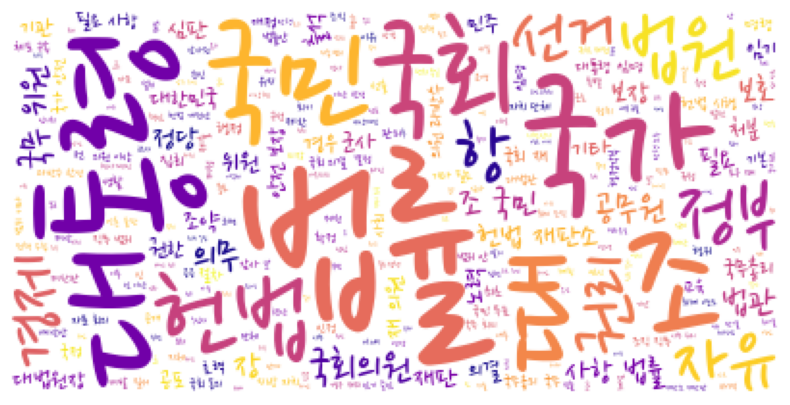

In [45]:
# data에서 명사(NN,NNS,NNP,NNPS)추출 -> 연결 -> 워드클라우드  
data_noun = ' '.join(noun_list)
print('명사 추출 :', noun_list[:5])
print('워드클라우들르 그릴 data :', data_noun[:20])
wordcloud = WordCloud(
    font_path='data/NanumPenScript-Regular.ttf', # 한글의 경우 반드시 폰트설정 필요
    background_color='white', # 배경색
    max_words=300,          # 표시될 단어의 최대 갯수
    # relative_scaling=0.9, # 단어 빈도에 따른 크기 차이 조정
    colormap='plasma', # 글씨 컬러맵
)
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [48]:
# 불용어(불용어지정 + 불용어사전)
from wordcloud import STOPWORDS
불용어 = STOPWORDS | {'대통령','조','때','항'}  # | :집합 합 연산자
# a = {'네모', '세모'}
# b = {'네모','동그라미'}
# a|b
불용어 = {'대통령','조','때','항'}
불용어

{'대통령', '때', '조', '항'}

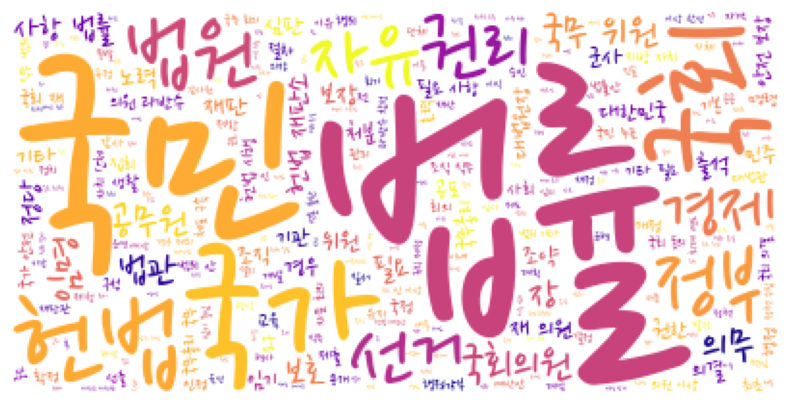

In [49]:
wordcloud = WordCloud(
    font_path='data/NanumPenScript-Regular.ttf', # 한글의 경우 반드시 폰트설정 필요
    background_color='white', # 배경색
    max_words=300,          # 표시될 단어의 최대 갯수
    # relative_scaling=0.9, # 단어 빈도에 따른 크기 차이 조정
    colormap='plasma', # 글씨 컬러맵
    stopwords=불용어    # 불용어
)
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

(numpy.ndarray, (468, 720, 3))

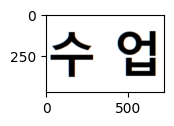

In [50]:
# 이미지를 넘파이 배열로(방법1) 가져오기
import cv2 
mask = cv2.imread('data/test.png')
plt.figure(figsize=(2,1))
plt.imshow(mask)
type(mask), mask.shape # 3채널 이미지

(numpy.ndarray, (468, 720, 3))

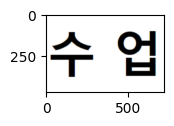

In [51]:
# 이미지를 넘파이 배열로(방법2) 가져오기
from PIL import Image
import numpy as np
img = Image.open('data/test.png')
mask = np.array(img)
plt.figure(figsize=(2,1))
plt.imshow(mask)
type(mask), mask.shape # 3채널 이미지

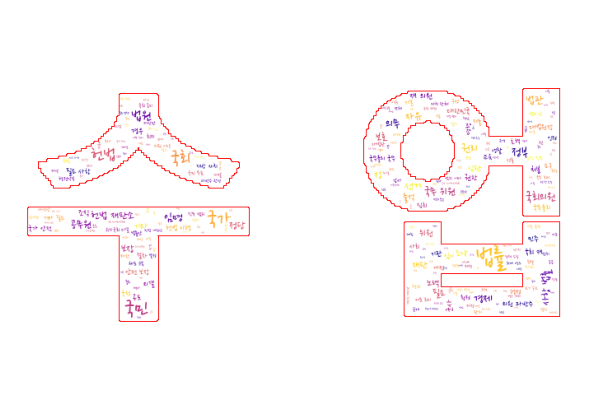

In [53]:
wordcloud = WordCloud(
    font_path='data/NanumPenScript-Regular.ttf', # 한글의 경우 반드시 폰트설정 필요
    background_color='white', # 배경색
    max_words=300,          # 표시될 단어의 최대 갯수
    # relative_scaling=0.9, # 단어 빈도에 따른 크기 차이 조정
    colormap='plasma', # 글씨 컬러맵
    stopwords=불용어,    # 불용어
    mask = mask,
    contour_color='red',# 테두리 색상
    contour_width=1     # 테두리 두께
)
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

(numpy.ndarray, (1600, 1600))

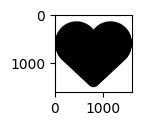

In [68]:
# mask = cv2.imread('data/heart.jpg')
img = Image.open('data/heart.jpg')
mask = np.array(img)
plt.figure(figsize=(2,1))
plt.imshow(mask, cmap='gray')
type(mask), mask.shape # 흑백 이미지

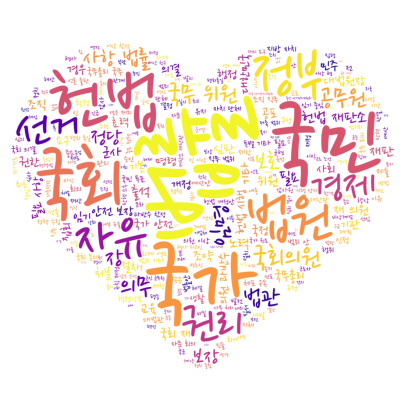

In [69]:
wordcloud = WordCloud(
    font_path='data/NanumPenScript-Regular.ttf', # 한글의 경우 반드시 폰트설정 필요
    background_color='white', # 배경색
    max_words=300,          # 표시될 단어의 최대 갯수
    # relative_scaling=0.9, # 단어 빈도에 따른 크기 차이 조정
    colormap='plasma', # 글씨 컬러맵
    stopwords=불용어,    # 불용어
    mask = mask,
#     contour_color='red',# 테두리 색상
#     contour_width=1     # 테두리 두께
)
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

(numpy.ndarray, (241, 257, 3))

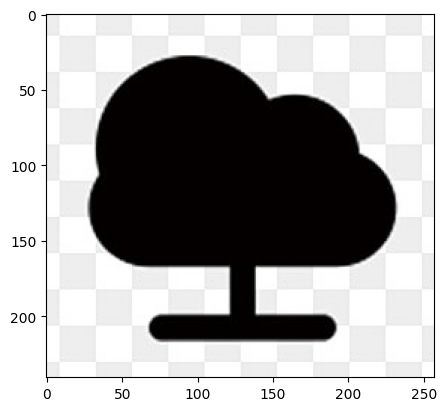

In [72]:
# mask = cv2.imread('data/test2.jpg')
img = Image.open('data/test2.jpg')
mask = np.array(img)
plt.figure(figsize=(5,5))
plt.imshow(mask)
type(mask), mask.shape # 3채널 컬러

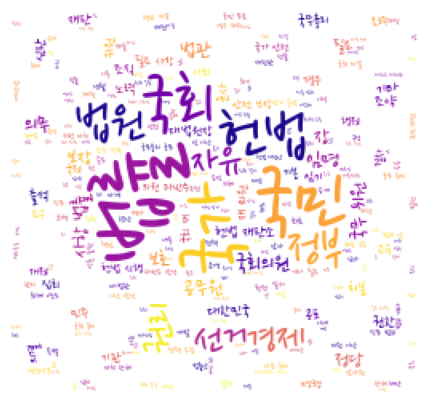

In [73]:
wordcloud = WordCloud(
    font_path='data/NanumPenScript-Regular.ttf', # 한글의 경우 반드시 폰트설정 필요
    background_color='white', # 배경색
    max_words=300,          # 표시될 단어의 최대 갯수
    # relative_scaling=0.9, # 단어 빈도에 따른 크기 차이 조정
    colormap='plasma', # 글씨 컬러맵
    stopwords=불용어,    # 불용어
    mask = mask,
#     contour_color='red',# 테두리 색상
#     contour_width=1     # 테두리 두께
)
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

mask 데이터 하나하나의 타입: uint8
mask 데이터 하나하나의 타입: uint8


(numpy.ndarray, (241, 257, 3))

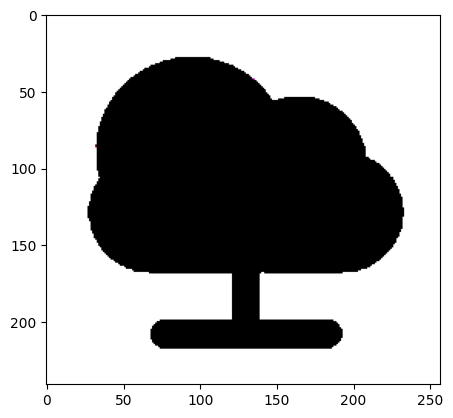

In [74]:
# 이미지 전처리 : 옅은 회색->하얀색
# mask = cv2.imread('data/test2.jpg')
img = Image.open('data/test2.jpg')
mask = np.array(img)
print('mask 데이터 하나하나의 타입:', mask.dtype)  # uint8 - 이미지 array
mask = np.where(mask>200, 255, 0).astype(np.uint8)
print('mask 데이터 하나하나의 타입:', mask.dtype)  # int32 - 

plt.imshow(mask)
type(mask), mask.shape # 3채널 컬러

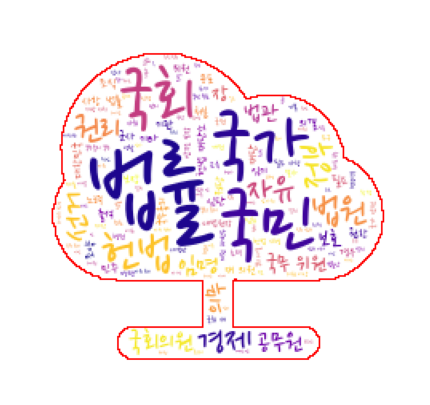

In [75]:
wordcloud = WordCloud(
    font_path='data/NanumPenScript-Regular.ttf', # 한글의 경우 반드시 폰트설정 필요
    background_color='white', # 배경색
    max_words=300,          # 표시될 단어의 최대 갯수
    # relative_scaling=0.9, # 단어 빈도에 따른 크기 차이 조정
    colormap='plasma', # 글씨 컬러맵
    stopwords=불용어,    # 불용어
    mask = mask,
    contour_color='red',# 테두리 색상
    contour_width=1     # 테두리 두께
)
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

(1124, 720, 3)


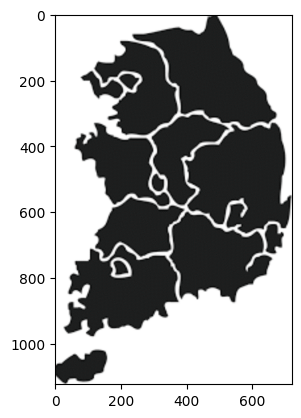

In [77]:
# 1채널이미지 -> 3채널 : convert('RGB')
img = Image.open('data/south_korea.png').convert('RGB')
mask = np.array(img)
plt.imshow(mask, )
print(mask.shape)

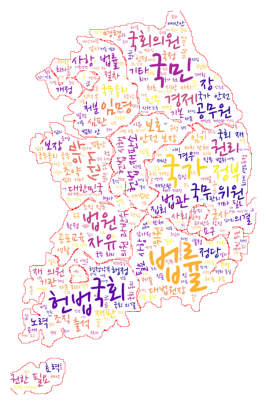

In [78]:
wordcloud = WordCloud(
    font_path='data/NanumPenScript-Regular.ttf', # 한글의 경우 반드시 폰트설정 필요
    background_color='white', # 배경색
    max_words=300,          # 표시될 단어의 최대 갯수
    # relative_scaling=0.9, # 단어 빈도에 따른 크기 차이 조정
    colormap='plasma', # 글씨 컬러맵
    stopwords=불용어,    # 불용어
    mask = mask,
    contour_color='red',# 테두리 색상
    contour_width=1     # 테두리 두께
)
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [79]:
# 생성된 wordcloud 저장
wordcloud.to_file('data/korea.jpg')

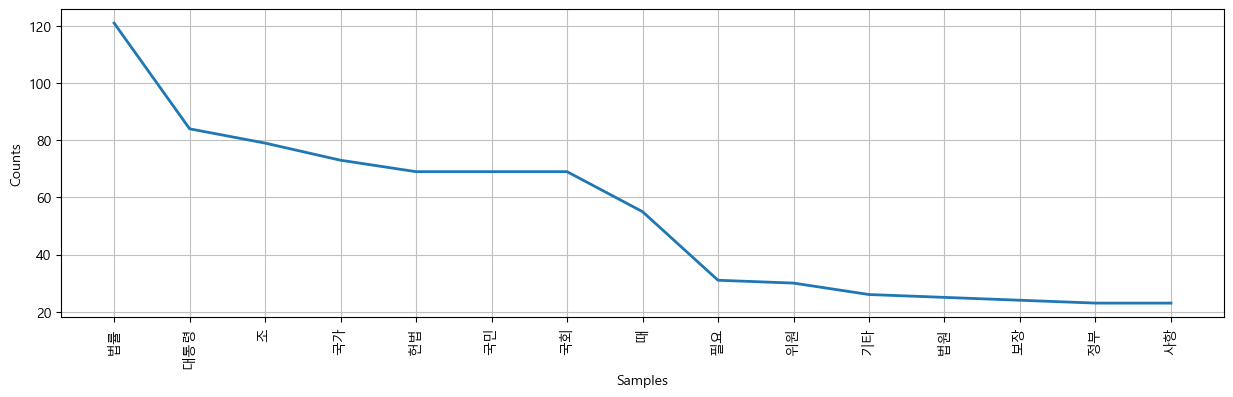

In [81]:
# 단어의 빈도수를 그래프로 시각화(nltk.Text)
import nltk
data_text = nltk.Text(noun_list)
plt.figure(figsize=(15,4))
plt.rc('font', family='Malgun Gothic')  # 윈도우즈에서 한글 처리
data_text.plot(15)
plt.show()